# APLICACIONES EN CIENCIAS DE COMPUTACION 2023-1

## Laboratorio 3: Implementacion metodos de busqueda ciega para el Problema de Busqueda de Rutas en Mapas

Indicaciones generales:

- Duración: **120 minutos (2 horas)**.
- **Las respuestas deben ser precisas**, no se considerará puntaje a respuestas que no contesten a lo solicitado.
- Cualquier indicio de plagio resultará en la anulación de la prueba.
- Subir el cuadernillo con el nombre **Lab3_código.ipynb**, donde código es su código PUCP de 8 dígitos.  
- Se tomará en cuenta en la calificación el uso de comentarios relevantes.

Objetivos:

- La tarea de este laboratorio consiste en implementar y comparar métodos de busqueda ciega para buscar rutas en mapas.


Al final de este notebook debe responder algunas preguntas.

### Clase Mapa

En el presente laboratorio se trabajará con el mapa de Romania, mostrado en la siguiente Figura

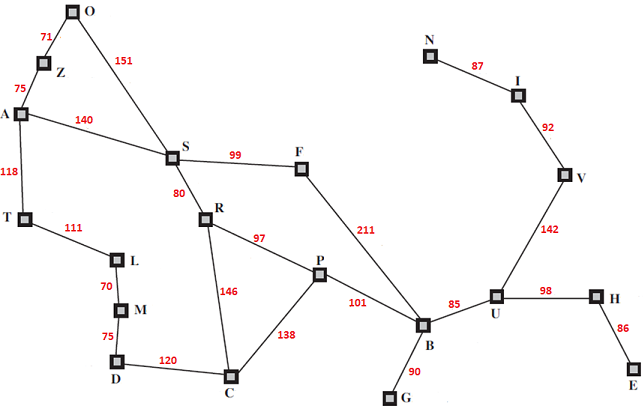

Se define la clase Mapa para almacenar la informacion de un mapa. Tiene dos atributos: <b>neighbors</b> (diccionario que contiene las ciudades vecinas de cada ciudad y las distancias para llegar a ellas) y <b>location</b>, diccionario con las coordenadas X,Y de cada ciudad.

In [ ]:
class Mapa:
    def __init__(self, neighbors, location):
        self.neighbors = neighbors
        self.location = location

In [ ]:
## neighbors  y  locations del mapa de Romania

neighbors = {
 'A': [('Z',75), ('T',118), ('S',140)],
 'B': [('F',211), ('P',101), ('G',90), ('U',85)],
 'C': [('D',120), ('R',146), ('P',138)],
 'D': [('M',75), ('C',120)],
 'E': [('H',86)],
 'F': [('S',99), ('B',211)],
 'G': [('B',90)],
 'H': [('U',98), ('E',86)],
 'I': [('N',87), ('V',92)],
 'L': [('T',111), ('M',70)],
 'M': [('L',70), ('D',75)],
 'N': [('I',87)],
 'O': [('Z',71), ('S',151)],
 'P': [('R',97), ('C',138), ('B',101)],
 'R': [('S',80), ('C',146), ('P',97)],
 'S': [('A',140), ('O',151), ('F',99), ('R',80)],
 'T': [('A',118), ('L',111)],
 'U': [('B',85), ('V',142), ('H',98)],
 'V': [('U',142), ('I',92)],
 'Z': [('O',71), ('A',75)]}

location = {
 'A': (91, 492),
 'B': (400, 327),
 'C': (253, 288),
 'D': (165, 299),
 'E': (562, 293),
 'F': (305, 449),
 'G': (375, 270),
 'H': (534, 350),
 'I': (473, 506),
 'L': (165, 379),
 'M': (168, 339),
 'N': (406, 537),
 'O': (131, 571),
 'P': (320, 368),
 'R': (233, 410),
 'S': (207, 457),
 'T': (94, 410),
 'U': (456, 350),
 'V': (509, 444),
 'Z': (108, 531)}

romania = Mapa(neighbors, location)  # insttancia objeto que tiene el mapa de Romania

### Clase <b>SearchProblem</b>

Esta es una clase abstracta para definir problemas de busqueda en general. Se debe hacer subclases que implementen los metodos de las acciones, resultados, test de objetivo y el costo de camino. Entonces se puede instanciar las subclases y resolverlos con varias funciones de busqueda.

In [ ]:
class SearchProblem(object):
    def __init__(self, initial, goal=None):
        """Este constructor especifica el estado inicial y posiblemente el estado(s) objetivo(s),
        La subclase puede añadir mas argumentos."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Retorna las acciones que pueden ser ejecutadas en el estado dado.
        El resultado es tipicamente una lista."""
        raise NotImplementedError

    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion dada en el estado state.
        La accion debe ser alguna de self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Retorna True si el estado pasado satisface el objetivo."""
        raise NotImplementedError

    def path_cost(self, c, state1, action, state2):
        """Retorna el costo del camino de state2 viniendo de state1 con 
        la accion action, asumiendo un costo c para llegar hasta state1. 
        El metodo por defecto cuesta 1 para cada paso en el camino."""
        return c + 1

    def value(self, state):
        """En problemas de optimizacion, cada estado tiene un valor. Algoritmos
        como Hill-climbing intentan maximizar este valor."""
        raise NotImplementedError

###  <b> Clase MapSearchProblem </b>  
Esta es una subclase de SearchProblem donde se define concretamente el problema de busqueda en mapa. El constructor recibe el estado inicial, objetivo y un mapa. Se necesita completar Actions (acciones disponibles para un estado dado) y path_cost.

**Completar la función actions que retorna las acciones ejecutables desde una ciudad específica**

In [ ]:
class MapSearchProblem(SearchProblem):
    def __init__(self, initial, goal, mapa):
        """El constructor recibe  el estado inicial, el estado objetivo y un mapa (de clase Mapa)"""
        self.initial = initial
        self.goal = goal
        self.map = mapa

    def actions(self, state):
        """Retorna las acciones ejecutables desde ciudad state.
        El resultado es una lista de strings tipo 'goCity'. 
        Por ejemplo, en el mapa de Romania, las acciones desde A serian:
         ['goZ', 'goT', 'goS']"""
        
        acciones = []
        neighbors = self.map.neighbors[state]  # obtiene la lista de tuplas con las ciudades vecinas a state
        
        for neigh in range(len(neighbors)):
            acciones.append('go'+neighbors[neigh][0])
                                                                                                                                                                                                                                                                                                              
        return acciones

    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion dada desde ciudad state.
        La accion debe ser alguna de self.actions(state)
        Por ejemplo, en el mapa de Romania, el resultado de aplicar la accion 'goZ' desde state 'A' seria 'Z'"""  
        
        newState =  action[2]
        
        return newState
        
    def goal_test(self, state):
        """Retorna True si state es self.goal"""
        return (self.goal == state) 

    def path_cost(self, c, state1, action, state2):
        """Retorna el costo del camino de state2 viniendo de state1 con la accion action 
        El costo del camino para llegar a state1 es c. El costo de la accion debe ser
        extraido de self.map."""
        actionCost = 0;
        destStates = self.map.neighbors[state1] #estado destino, state2
        
        for acc in range(len(destStates)):
            if (destStates[acc][0] == state2):
                actionCost = destStates[acc][1]
                break
        return c + actionCost;

### Clase <b>Node</b>

Estructura de datos para almacenar la informacion de un nodo en un <b>arbol de busqueda</b>. Contiene información del nodo padre y el estado que representa el nodo. Tambien incluye la accion que nos llevo al presente nodo y el costo total del camino desde el nodo raiz hasta este nodo.

**Completar la función path que retorna la lista de nodos que va de la raíz a este nodo**

In [ ]:
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        "Crea un nodo de arbol de busqueda, derivado del nodo parent y accion action"
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def expand(self, problem):
        "Devuelve los nodos alcanzables en un paso a partir de este nodo."
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        next = problem.result(self.state, action)
        return Node(next, self, action,
                    problem.path_cost(self.path_cost, self.state, action, next))

    def solution(self):
        "Retorna la secuencia de acciones para ir de la raiz a este nodo."
        return [node.action for node in self.path()[1:]]

    def path(self):
        "Retorna una lista de nodos formando un camino de la raiz a este nodo."
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))
    
    def __eq__(self, other): 
        "Este metodo se ejecuta cuando se compara nodos. Devuelve True cuando los estados son iguales"
        return isinstance(other, Node) and self.state == other.state

### <b> Definición de fronteras</b>
Se definen las clases correspondientes a colas FIFO y LIFO para usar como fronteras.

In [ ]:
from collections import deque

class FIFO(deque):
    """Una cola First-In-First-Out"""
    def pop(self):
        return self.popleft()

class LIFO(deque):
    """Una cola Last-In-First-Out"""

### <b>Algoritmo general de búsqueda con memoria de nodos expandidos (Graph Search)</b>

Algoritmo de general de busqueda ciega con memoria de estados visitados. El argumento frontier debe ser una cola vacia FIFO o LIFO. Explora la frontera de acuerdo al algoritmo de búsqueda en árboles visto en clase



In [ ]:
def graph_search(problem, frontier):
    frontier.append(Node(problem.initial))  # coloca nodo con estado inicial en la frontera
    explored = set()     # memoria de estados visitados
    expanded_nodes = 0   # contador de nodos expandidos
    while frontier:
        node = frontier.pop()  # extrae un node de la frontera
        if problem.goal_test(node.state): # si el nodo contiene estado objetivo 
            return node, expanded_nodes
        explored.add(node.state)  # añade el estado del nodo al set de explorados
        expanded_nodes = expanded_nodes + 1
        frontier.extend(child for child in node.expand(problem)  # genera los hijos del nodo y los añade a la frontera 
                        if child.state not in explored and
                        child not in frontier)
    return None

### <b> Probando los algoritmos de Busqueda</b> 
Ejecuta la búsqueda BFS, DFS aplicando la frontera correspondiente e imprime los resultados. El output de la siguiente celda debe ser el siguiente:

Solucion obtenida con BFS: ['goS', 'goF', 'goB']. Nodos expandidos = 9.

Solucion obtenida con DFS: ['goS', 'goR', 'goP', 'goB']. Nodos expandidos = 4. 


In [ ]:
p = MapSearchProblem('A', 'U', romania)   # instancia problema de busqueda de ruta de A a B

# busqueda en amplitud
node, num_exp_nodes = graph_search(p, FIFO())
print( 'Solucion obtenida con BFS: {}. Nodos expandidos = {}'.format(node.solution(), num_exp_nodes) )

# busqueda en profundidad
node, num_exp_nodes = graph_search(p, LIFO())
print( 'Solucion obtenida con DFS: {}. Nodos expandidos = {}'.format(node.solution(), num_exp_nodes) )  

Solucion obtenida con BFS: ['goS', 'goF', 'goB', 'goU']. Nodos expandidos = 14
Solucion obtenida con DFS: ['goS', 'goR', 'goP', 'goB', 'goU']. Nodos expandidos = 5


## Preguntas

<b>0) Completar el código y ejecutar satisfactoriamente las pruebas</b> (4 pts)

<b>1) Probar BFS y DFS en los siguientes problemas (registre la ruta tomada y los nodos expandidos): </b> (4 pts)
* p = MapSearchProblem('A', 'D', romania)
* p = MapSearchProblem('F', 'Z', romania)
* p = MapSearchProblem('N', 'R', romania)
* p = MapSearchProblem('A', 'U', romania)

<b>2) Compare los nodos expandidos al buscar la ruta entre P y R, y explique la diferencia utilizando la teoría detrás de las búsquedas BFS y DFS </b> (4 pts)

<b>3) Indique si BFS o DFS garantizan encontrar la ruta de costo minimo. Justifique</b> (2 pts)

<b>4) Indique si BFS o DFS garantizan encontrar la ruta con menos cantidad de acciones. Justifique</b> (2 pts)

<b>5) Explique brevemente para qué sirve la frontera en los algoritmos de busqueda</b> (2 pts)

<b>6) ¿Por qué se implementa una memoria de estados visitados (explored set) en el algoritmo de búsqueda en grafo? </b> (2 pts)

1-

p = MapSearchProblem('A', 'D', romania)

Solucion obtenida con BFS: ['goT', 'goL', 'goM', 'goD']. Nodos expandidos = 12

Solucion obtenida con DFS: ['goS', 'goR', 'goC', 'goD']. Nodos expandidos = 13

p = MapSearchProblem('F', 'Z', romania)

Solucion obtenida con BFS: ['goS', 'goA', 'goZ']. Nodos expandidos = 9

Solucion obtenida con DFS: ['goB', 'goP', 'goC', 'goD', 'goM', 'goL', 'goT', 'goA', 'goZ']. Nodos expandidos = 16

p = MapSearchProblem('N', 'R', romania)

Solucion obtenida con BFS: ['goI', 'goV', 'goU', 'goB', 'goP', 'goR']. Nodos expandidos = 11

Solucion obtenida con DFS: ['goI', 'goV', 'goU', 'goB', 'goP', 'goR']. Nodos expandidos = 18

p = MapSearchProblem('A', 'U', romania)

Solucion obtenida con BFS: ['goS', 'goF', 'goB', 'goU']. Nodos expandidos = 14

Solucion obtenida con DFS: ['goS', 'goR', 'goP', 'goB', 'goU']. Nodos expandidos = 5


2-

Casos como el de p = MapSearchProblem('A', 'U', romania) la diferencia es bastante grande, ya que el DPS al priorizar el realizar acciones e ir al fondo de estas, no requirio tanta expansion de nodos. BFS, al haber varios caminos para llegar a U, expandio mas nodos intentando hallar la manera correcta de llegar a U.
Sin embargo, en casos como  = MapSearchProblem('N', 'R', romania), DFS se centro en analizar a profundidad caminos que terminaban en estados sin salida (donde no habia opcion mas alla de retroceder), mientras que BFS exploraba las opciones que tiene disponibles por cada estado, de modo que se logro localizar R de forma mas efectiva sin expandir muchos nodos.

3- 
BFS garantiza encontrar la ruta d costo minimo, si es que la cantidad de nodos maxima que sale de un nodo padre es finita y todas las acciones tuvieran el mismo costo. Sin embargo, DFS no brinda esta garantia, ya que el algoritmo termina cuando se encuentra una solucion al problema, el cual puede no ser la solucion que tenga el costo minimo.

4- 

DFS no garantiza encontrar la solucion con la menor cantidad de acciones, ya que, como se ha mencionado, devuelve la primera solucion que encuentra, la cual puede no ser la que tenga menor cantidad de acciones.
Por otro lado, BFS si garantizaria, ya que al revisar cada nivel a detalle puede saberse cual camino requeriria una menor profundidad, lo que significa una menor cantidad de acciones.

5-

La frontera contiene los nodos aun no explorados. Por ello, en ella se almacenan los estados que quedan por alcanzar, lo que da pie a acciones que se puedan realizar para alcanzar dichos estados. Si la frontera se termina, significa que ya no hay más estados por explorar, entonces no hay mas acciones por realizar y, consecuentemente, no hay solucion.

6- 

El explored set o memoria de estados visitados es aquel que permite guardar que nodos han sido visitados a la hora de resolver el problema. Es necesario para almacenar que caminos ya se han tomado para llegar a resolver el problema y no caer en la repeticion (Por ejemplo, en el problema del mapa sin memoria se podria estar yendo entre 2 mismas ciudades una y otra vez, generando un bucle infinito y no determinando la respuesta)
